# Train football camera view

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
from fastai import *
from fastai.vision import *
import io
import requests
import csv
import PIL
from torchvision import models, transforms
from torch.autograd import Variable

In [3]:
PATH = Path(r'C:\Users\Jimmy\data\football_multi_label')

In [4]:
with open(PATH/'labels.csv') as f:
    labels = list(csv.reader(f))

In [10]:
tfms = get_transforms(do_flip=False, flip_vert=False, max_rotate=15, max_zoom=0.0, max_lighting=0.4, 
                      max_warp=0.2)
data = ImageDataBunch.from_csv(PATH, folder='train', ds_tfms=tfms, label_delim=' ')

In [11]:
data.classes

['closeup_shot',
 'crowd',
 'goal_left',
 'goal_right',
 'high_angle',
 'long_shot',
 'low_angle',
 'other',
 'yellow_card']

In [6]:
len(data.train_ds), len(data.valid_ds)

(237, 59)

In [13]:
data.show_batch(rows=4, figsize=(10, 10))

In [7]:
learn = cnn_learner(data, models.resnet18, metrics=accuracy, pretrained=True)  #.to_fp16()

In [11]:
torch.cuda.current_device()

AssertionError: Torch not compiled with CUDA enabled

In [8]:
learn

Learner(data=ImageDataBunch;

Train: LabelList (237 items)
x: ImageList
Image (3, 400, 720),Image (3, 400, 720),Image (3, 400, 720),Image (3, 400, 720),Image (3, 400, 720)
y: MultiCategoryList
high_angle long_shot,goal_right,high_angle long_shot,goal_left,low_angle closeup_shot
Path: C:\Users\Jimmy\data\football_multi_label;

Valid: LabelList (59 items)
x: ImageList
Image (3, 400, 720),Image (3, 400, 720),Image (3, 400, 720),Image (3, 400, 720),Image (3, 400, 720)
y: MultiCategoryList
goal_left,high_angle long_shot,high_angle closeup_shot,long_shot high_angle,high_angle long_shot
Path: C:\Users\Jimmy\data\football_multi_label;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (

## Train

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

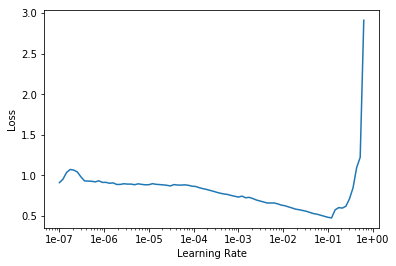

In [18]:
learn.recorder.plot(skip_start=0, skip_end=0)

In [19]:
lr = 5e-2

In [20]:
learn.fit_one_cycle(10, slice(lr))

In [13]:
learn.save('resnet101-stage-1')

In [14]:
learn.load('resnet101-stage-1');

In [15]:
learn.unfreeze()

In [16]:
lrs = slice(lr/100,lr)

In [21]:
learn.fit_one_cycle(20, lrs)

NameError: name 'lrs' is not defined

In [22]:
learn.export('learn_export.pkl')

In [124]:
learn.save('resnet101-stage-2')

In [91]:
learn.load('resnet101-stage-2');

FileNotFoundError: [Errno 2] No such file or directory: '/home/Jimmy/data/ice_hockey/AHL-2019-01-26-Tucson-Bakersfield/models/resnet101-stage-2.pth'

## Analyse training

In [18]:
learn.load('resnet101-stage-1');

In [1]:
interp = ClassificationInterpretation.from_learner(learn)

NameError: name 'ClassificationInterpretation' is not defined

In [23]:
len(data.classes)

58

In [24]:
1/len(data.classes)*100

1.7241379310344827

In [25]:
interp.plot_confusion_matrix(figsize=(10, 10))

NameError: name 'interp' is not defined

In [98]:
interp.plot_top_losses(9)

## Test inference

In [128]:
empty_data = ImageDataBunch.load_empty(PATH, fname='data-export.pkl')

In [129]:
learn = create_cnn(empty_data, models.resnet101).load('resnet101-stage-2')

In [132]:
img = data.train_ds[0][0]
learn.predict(img_torch)

(Category  white,
 tensor(3),
 tensor([5.6761e-07, 6.1301e-06, 8.5078e-08, 9.9999e-01, 6.4357e-09, 2.0455e-06]))

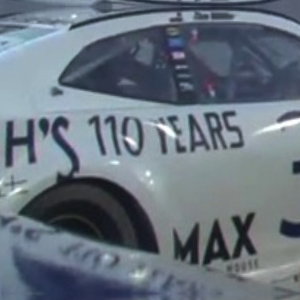

In [133]:
img